In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta

In [27]:
from jupyterthemes import jtplot
jtplot.style()

In [28]:
# Company Info

# 1) which all all services do you offer?

# Growth driven web design and development - 2.5L - 10L 
# App development  2L - 12L 
# Digital transformation service 1.5L - 10L 
# Digital strategy and consultation  50K - 5L

# 2) price range of each of the services? 

# Growth driven web design and development - 2.5L - 10L 
# App development  2L - 12L 
# Digital transformation service 1.5L - 10L 
# Digital strategy and consultation  50K - 5L


# 3) monthly approx how many orders you get for each service?

# Descending order: 

# C Digital transformation service 
# A Growth driven Web design and development 
# D Digital strategy and Consultation 
# B App development 

# 4) locations the company works in?

# Location  Demand 
# India   60%
# Australia  30%
# Canada  10%


In [29]:
'Growth Driven Web Design and Development'
'App Development'
'Digital Transformation Service'
'Digital Strategy and Consultation'

'Digital Strategy and Consultation'

In [30]:
projects_per_year={
    2018:71,
    2019:123,
    2020:68,
    2021:153
#     2022:80
}

service_names={'A':'Growth Driven Web Design and Development',
          'B':'App Development',
          'C':'Digital Transformation Service',
          'D':'Digital Strategy and Consultation'}

time_taken_for_projects={
    'A':[20,120],
    'B':[15,80],
    'C':[15,30],
    'D':[5,10]
}

service_rarity={
    'A':0.3,
    'B':0.1,
    'C':0.4,
    'D':0.2,
}

price_range_of_services={
    'A':[250000,1000000],
    'B':[200000,1200000],
    'C':[150000,1000000],
    'D':[50000,500000]
}

location_rarity={
    'IND':0.6,
    'CAN':0.3,
    'AUS':0.1
}

project_teams={
    'A':['Team A', 'Team B', 'Team C'],
    'B':['Team C', 'Team D'],
    'C':['Team A', 'Team F'],
    'D':['Team A', 'Team C', 'Team F']
}

In [31]:
def round_value(num,base=None):
    num=int(num)
    length=len(str(num))
    if base is not None:
        base=base
    elif length <= 2:
        base=5
    else:
        base = 10**(length-2)
        if base > 10000:
            base = 10000

    rounded_num = base * round(num/base)
    return rounded_num

## Custom Scaler to Scale Values to a certain Range
def scaler_equation(value,min_range,max_range,min_data,max_data):
    return ((max_range - min_range) * ( (value - min_data) / (max_data - min_data) )) + min_range

def get_proj_date(year,day_num):  
    # Initializing start date
    strt_date = date(int(year), 1, 1)

    # converting to date
    proj_date = strt_date + timedelta(days=int(day_num) - 1)
    if proj_date.strftime('%A') == 'Sunday':
        proj_date = proj_date + timedelta(days=1)
#     str_proj_date = proj_date.strftime("%Y-%m-%d")
    return proj_date

def gen_bias(no_of_values,min_range,max_range):
    data=np.random.uniform(low=min_range,high=max_range,size=no_of_values-1)
    data=np.append(data,np.array([-1*np.sum(data)]))
    np.random.shuffle(data)
    return data


def get_services(no_of_projects):
#     services=list(service_rarity.keys())
#     while True:
#         percentage = [service_rarity[service] for service in services]
#         bias=gen_bias(no_of_values=len(percentage),min_range=-0.1,max_range=0.1)
#         percentage = [percentage[i]+bias[i] for i in range(len(percentage))]
#         repeats = np.around(np.array(percentage) * no_of_projects).astype(np.int8)
#         if not np.any(repeats<0):
#             break
#     data =np.repeat(services, repeats)
#     np.random.shuffle(data)
    total=no_of_projects+1
    services=list(service_rarity.keys())
    percentage = [service_rarity[service] for service in services]
    bias=gen_bias(no_of_values=len(percentage),min_range=-0.1,max_range=0.1)
    percentage = [percentage[i]+bias[i] for i in range(len(percentage))]
    data=sum([[e]*int(total*p) for e,p in zip(services, percentage)], [])
    np.random.shuffle(data)
    if len(data) > no_of_projects:
        data=data[:no_of_projects]
    elif len(data) < no_of_projects:
        data=np.append(data,data[:no_of_projects-len(data)])
    return data

def get_locations(no_of_projects):
#     locations=list(location_rarity.keys())
#     while True:
#         percentage = [location_rarity[location] for location in locations]
#         bias=gen_bias(no_of_values=len(percentage),min_range=-0.09,max_range=0.09)
#         percentage = [percentage[i]+bias[i] for i in range(len(percentage))]
#         repeats = np.around(np.array(percentage) * no_of_projects).astype(np.int8)
#         if not np.any(repeats<0):
#             break
#     data =np.repeat(locations, repeats)
    total=no_of_projects+1
    locations=list(location_rarity.keys())
    percentage = [location_rarity[location] for location in locations]
    bias=gen_bias(no_of_values=len(percentage),min_range=-0.09,max_range=0.09)
    percentage = [percentage[i]+bias[i] for i in range(len(percentage))]
    data=sum([[e]*int(total*p) for e,p in zip(locations, percentage)], [])
    np.random.shuffle(data)
    if len(data) > no_of_projects:
        data=data[:no_of_projects]
    elif len(data) < no_of_projects:
        data=np.append(data,data[:no_of_projects-len(data)])
    return data

In [32]:
df=pd.DataFrame()
for year in projects_per_year.keys():
    no_of_projects=projects_per_year[year]
    scale=365/no_of_projects
    print(year,no_of_projects)
    day_nums=np.ceil(np.arange(1,no_of_projects)*scale)
    services=get_services(no_of_projects=no_of_projects)
    locations=get_locations(no_of_projects=no_of_projects)
    for day_num, location, service in zip(day_nums,locations,services):
        service_name=service_names[service]
        proj_date=get_proj_date(year=year,day_num=day_num)
        price_low,price_high=price_range_of_services[service]
        price=round_value(np.random.randint(low=price_low,high=price_high), base=1000)

        days_low,days_high=time_taken_for_projects[service]
        days_taken=round(scaler_equation(value=price,max_data=price_high,min_data=price_low,max_range=days_high,min_range=days_low))

        start_date=proj_date
        end_date=start_date+timedelta(days=days_taken)

        proj_date=proj_date.strftime('%Y-%m-%d')
        start_date=start_date.strftime('%Y-%m-%d')
        end_date=end_date.strftime('%Y-%m-%d')
        proj_teams=project_teams[service]
        proj_team=proj_teams[np.random.randint(len(proj_teams))]
#         print(proj_no,proj_date,start_date,end_date,location,service_name,proj_team)
        data={}
        data['start_date']=[start_date]
        data['end_date']=[end_date]
        data['location']=[location]
        data['service']=[service_name]
        data['days_taken']=[days_taken]
        data['price']=[price]
        data['team']=[proj_team]
        
        df=pd.concat([df,pd.DataFrame(data)],axis=0)

2018 71
2019 123
2020 68
2021 153


In [33]:
df.reset_index(drop=True,inplace=True)
df

,start_date,end_date,location,service,days_taken,price,team
0,2018-01-06,2018-02-01,AUS,Digital Transformation Service,26,786000,Team A
1,2018-01-11,2018-03-13,IND,Growth Driven Web Design and Development,61,560000,Team B
2,2018-01-16,2018-02-08,CAN,Digital Transformation Service,23,623000,Team F
3,2018-01-22,2018-01-31,IND,Digital Strategy and Consultation,9,401000,Team A
4,2018-01-26,2018-02-05,CAN,Digital Strategy and Consultation,10,496000,Team C
...,...,...,...,...,...,...,...
406,2021-12-20,2022-01-06,CAN,Digital Transformation Service,17,252000,Team F
407,2021-12-22,2022-01-01,IND,Digital Strategy and Consultation,10,479000,Team F
408,2021-12-24,2022-01-27,CAN,Growth Driven Web Design and Development,34,354000,Team B
409,2021-12-27,2022-02-26,CAN,App Development,61,911000,Team C


In [34]:
df=df.reset_index()
df=df.rename(columns={'index':'proj_no'})
df['proj_no']=df['proj_no'].apply(lambda x:x+1)
df

,proj_no,start_date,end_date,location,service,days_taken,price,team
0,1,2018-01-06,2018-02-01,AUS,Digital Transformation Service,26,786000,Team A
1,2,2018-01-11,2018-03-13,IND,Growth Driven Web Design and Development,61,560000,Team B
2,3,2018-01-16,2018-02-08,CAN,Digital Transformation Service,23,623000,Team F
3,4,2018-01-22,2018-01-31,IND,Digital Strategy and Consultation,9,401000,Team A
4,5,2018-01-26,2018-02-05,CAN,Digital Strategy and Consultation,10,496000,Team C
...,...,...,...,...,...,...,...,...
406,407,2021-12-20,2022-01-06,CAN,Digital Transformation Service,17,252000,Team F
407,408,2021-12-22,2022-01-01,IND,Digital Strategy and Consultation,10,479000,Team F
408,409,2021-12-24,2022-01-27,CAN,Growth Driven Web Design and Development,34,354000,Team B
409,410,2021-12-27,2022-02-26,CAN,App Development,61,911000,Team C


In [35]:
if not os.path.isdir('data'):
    os.makedirs('data')

In [36]:
filename=os.path.join('data','dummy_data.csv')
filename

'data/dummy_data.csv'

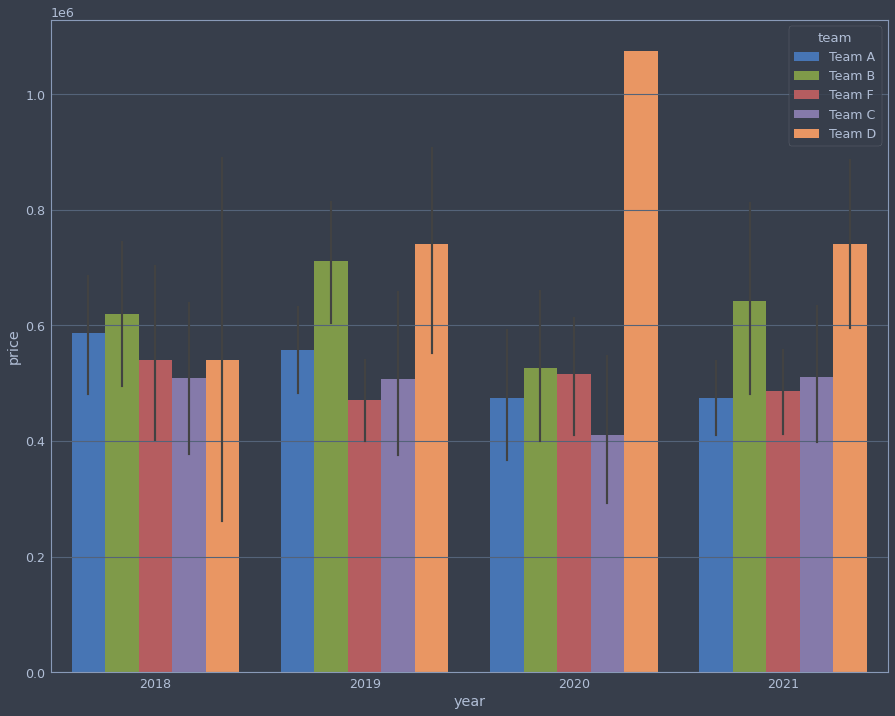

In [43]:
df['year']=df['start_date'].apply(lambda x: int(x.split('-')[0]))
f=plt.figure(figsize=(15,12))
sns.barplot(data=df,x='year',y='price', hue='team')
df=df.drop(columns='year')

In [44]:
df.to_csv(filename,index=False)